In [1]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [2]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [11]:

file_data  = spark.read.csv(r'D:\Code_Place\Data-Science\Scikit Learn\dataset_6\netdata.csv', inferSchema=True,header=True)
file_data.printSchema()


root
 |-- duration: integer (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- srv_count: integer (nullable = true)
 |-- serror_rate: double (nullable = true)
 |-- rerror_rate: double (nullable = true)
 |-- dst_host_count: integer (nullable = true)
 |-- dst_host_srv_count: integer (nullable = true)
 |-- _c21: string (nullable = true)
 |-- Connections: integer (nullable = true)



In [4]:
file_data.count()

22544

In [12]:
file_data.head(5)

[Row(duration=0, protocol_type='tcp', service='private', flag='REJ', src_bytes=0, dst_bytes=0, land=0, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, logged_in=0, num_outbound_cmds=0, is_host_login=0, is_guest_login=0, count=229, srv_count=10, serror_rate=0.0, rerror_rate=1.0, dst_host_count=255, dst_host_srv_count=10, _c21=None, Connections=0),
 Row(duration=0, protocol_type='tcp', service='private', flag='REJ', src_bytes=0, dst_bytes=0, land=0, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, logged_in=0, num_outbound_cmds=0, is_host_login=0, is_guest_login=0, count=136, srv_count=1, serror_rate=0.0, rerror_rate=1.0, dst_host_count=255, dst_host_srv_count=1, _c21=None, Connections=0),
 Row(duration=2, protocol_type='tcp', service='ftp_data', flag='SF', src_bytes=12983, dst_bytes=0, land=0, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, logged_in=0, num_outbound_cmds=0, is_host_login=0, is_guest_login=0, count=1, srv_count=1, serror_rate=0.0, rerror_rate=0.0, 

In [7]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

In [5]:
file_data.describe().show()

+-------+------------------+-------------+-------+-----+------------------+------------------+--------------------+--------------------+------------------+-------------------+--------------------+------------------+-----------------+--------------------+--------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+
|summary|          duration|protocol_type|service| flag|         src_bytes|         dst_bytes|                land|      wrong_fragment|            urgent|                hot|   num_failed_logins|         logged_in|num_outbound_cmds|       is_host_login|      is_guest_login|             count|         srv_count|        serror_rate|        rerror_rate|   dst_host_count|dst_host_srv_count|
+-------+------------------+-------------+-------+-----+------------------+------------------+--------------------+--------------------+------------------+-------------------+--------------------+------------------+---

In [13]:
import numpy as np
import pandas as pd
df_main = file_data.toPandas()
df_main.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,dst_host_count,dst_host_srv_count,_c21,Connections
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0,0,229,10,0.0,1.0,255,10,None,0.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0,0,136,1,0.0,1.0,255,1,None,0.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0,0,1,1,0.0,0.0,134,86,None,0.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0,0,1,65,0.0,0.0,3,57,None,0.0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0,0,1,8,0.0,1.0,29,86,None,0.0


In [14]:

df_main = df_main.fillna(0)


In [15]:
df = df_main.copy()
df.dtypes

duration                int32
protocol_type          object
service                object
flag                   object
src_bytes               int32
dst_bytes               int32
land                    int32
wrong_fragment          int32
urgent                  int32
hot                     int32
num_failed_logins       int32
logged_in               int32
num_outbound_cmds       int32
is_host_login           int32
is_guest_login          int32
count                   int32
srv_count               int32
serror_rate           float64
rerror_rate           float64
dst_host_count          int32
dst_host_srv_count      int32
_c21                    int64
Connections           float64
dtype: object

In [16]:
df = df.astype({"Connections":'int', "serror_rate":'int',"rerror_rate":'int'}) 
df.dtypes

duration               int32
protocol_type         object
service               object
flag                  object
src_bytes              int32
dst_bytes              int32
land                   int32
wrong_fragment         int32
urgent                 int32
hot                    int32
num_failed_logins      int32
logged_in              int32
num_outbound_cmds      int32
is_host_login          int32
is_guest_login         int32
count                  int32
srv_count              int32
serror_rate            int32
rerror_rate            int32
dst_host_count         int32
dst_host_srv_count     int32
_c21                   int64
Connections            int32
dtype: object

In [17]:
df['protocol_type'] = pd.Categorical(df['protocol_type'])
df['protocol_type'] = df.protocol_type.cat.codes
df['service'] = pd.Categorical(df['service'])
df['service'] = df.service.cat.codes
df['flag'] = pd.Categorical(df['flag'])
df['flag'] = df.flag.cat.codes
df['serror_rate'] = pd.Categorical(df['serror_rate'])
df['serror_rate'] = df.serror_rate.cat.codes
df['rerror_rate'] = pd.Categorical(df['rerror_rate'])
df['rerror_rate'] = df.rerror_rate.cat.codes


In [18]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,dst_host_count,dst_host_srv_count,_c21,Connections
22539,0,1,49,9,794,333,0,0,0,0,...,0,0,1,1,0,0,100,141,0,0
22540,0,1,22,9,317,938,0,0,0,0,...,0,0,2,11,0,0,197,255,0,0
22541,0,1,22,9,54540,8314,0,0,0,2,...,0,0,5,10,0,0,255,255,0,0
22542,0,2,11,9,42,42,0,0,0,0,...,0,0,4,6,0,0,255,252,0,0
22543,0,1,52,1,0,0,0,0,0,0,...,0,0,4,10,0,1,255,21,0,0


In [11]:
# df['LS'] = pd.Categorical(df['LS']).apply(int)
df.dtypes

duration              int32
protocol_type          int8
service                int8
flag                   int8
src_bytes             int32
dst_bytes             int32
land                  int32
wrong_fragment        int32
urgent                int32
hot                   int32
num_failed_logins     int32
logged_in             int32
num_outbound_cmds     int32
is_host_login         int32
is_guest_login        int32
count                 int32
srv_count             int32
serror_rate            int8
rerror_rate            int8
dst_host_count        int32
dst_host_srv_count    int32
dtype: object

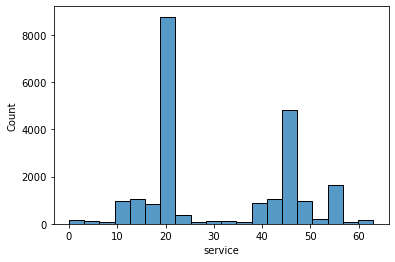

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# trans_data = sns.load_dataset("iris")

sns.histplot(data=df, x="service", bins=20)
plt.show()

In [20]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'dst_host_count', 'dst_host_srv_count', '_c21', 'Connections'],
      dtype='object')

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'protocol_type'}>],
       [<AxesSubplot:title={'center':'service'}>,
        <AxesSubplot:title={'center':'flag'}>]], dtype=object)

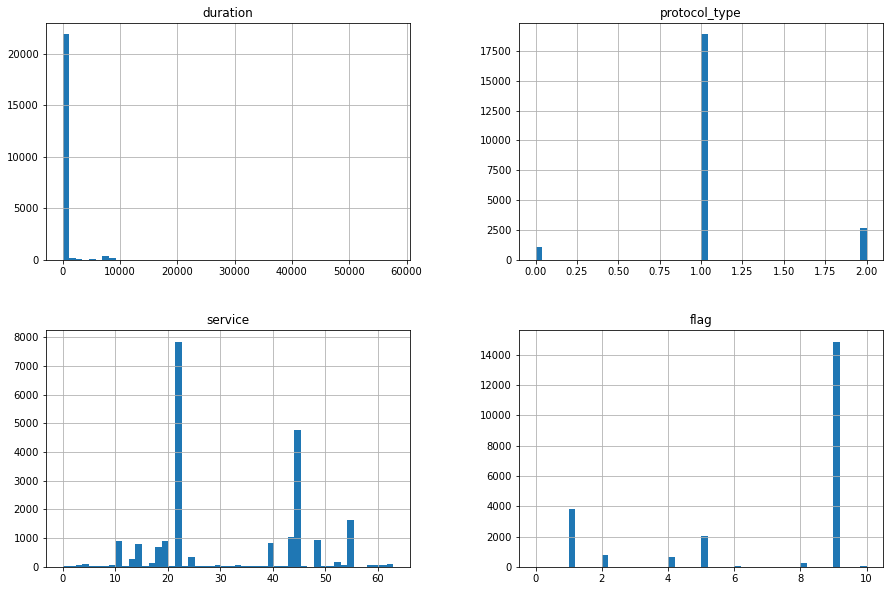

In [14]:

clist = ['duration', 'protocol_type', 'service', 'flag']
df_hist = df[clist]
df_hist.hist(bins=50, figsize=(15,10))


In [21]:
numaric_call = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'dst_host_count', 'dst_host_srv_count','Connections']
data = df[numaric_call]
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,dst_host_count,dst_host_srv_count,Connections
0,0,1,45,1,0,0,0,0,0,0,...,0,0,0,229,10,0,1,255,10,0
1,0,1,45,1,0,0,0,0,0,0,...,0,0,0,136,1,0,1,255,1,0
2,2,1,19,9,12983,0,0,0,0,0,...,0,0,0,1,1,0,0,134,86,0
3,0,0,13,9,20,0,0,0,0,0,...,0,0,0,1,65,0,0,3,57,0
4,1,1,55,2,0,15,0,0,0,0,...,0,0,0,1,8,0,1,29,86,0


In [199]:
data.logged_in.unique()

array([0, 1])

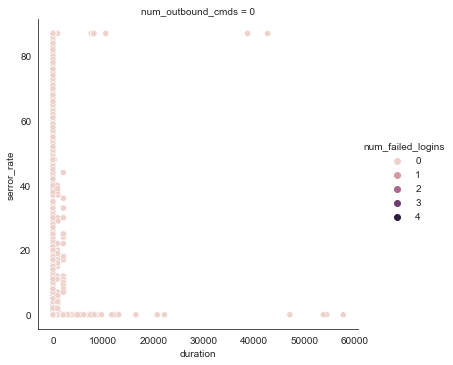

In [77]:
sns.relplot(data=data, x="duration", y="serror_rate", hue="num_failed_logins", col="num_outbound_cmds")

In [22]:
dataset = data.copy()
dataset.isna().sum()

duration              0
protocol_type         0
service               0
flag                  0
src_bytes             0
dst_bytes             0
land                  0
wrong_fragment        0
urgent                0
hot                   0
num_failed_logins     0
logged_in             0
num_outbound_cmds     0
is_host_login         0
is_guest_login        0
count                 0
srv_count             0
serror_rate           0
rerror_rate           0
dst_host_count        0
dst_host_srv_count    0
Connections           0
dtype: int64

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='service', ylabel='Density'>

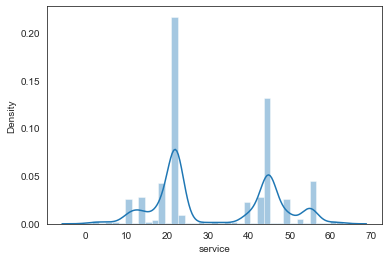

In [81]:
sns.distplot(data['service'])

In [18]:
dataset.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,logged_in,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,dst_host_count,dst_host_srv_count
duration,1.000000,-0.023278,0.173343,0.066880,0.002673,0.078951,-0.002741,-0.009193,-0.000048,-0.004688,...,-0.075685,NaN,-0.002631,0.000076,-0.090544,-0.046632,-0.021893,-0.039350,0.060631,0.010076
protocol_type,-0.023278,1.000000,0.164598,0.116758,-0.004244,-0.016350,-0.003107,0.058529,-0.003431,-0.020014,...,-0.156976,NaN,-0.003895,-0.030160,0.016415,0.074430,-0.061880,-0.100870,0.164750,0.092421
service,0.173343,0.164598,1.000000,-0.327780,-0.029378,-0.029529,-0.018011,0.020846,0.029643,-0.080366,...,-0.321984,NaN,-0.010654,-0.161499,0.159983,-0.115281,0.190952,0.267146,0.281052,-0.379541
flag,0.066880,0.116758,-0.327780,1.000000,0.009959,0.059041,-0.010290,0.039142,0.012887,0.070000,...,0.488098,NaN,0.014632,0.112794,-0.456812,0.148419,-0.165619,-0.912050,-0.319749,0.620387
src_bytes,0.002673,-0.004244,-0.029378,0.009959,1.000000,0.053634,-0.000388,-0.001247,-0.000333,0.002631,...,-0.009632,NaN,-0.000479,-0.003705,-0.012451,-0.006029,-0.007249,-0.005736,-0.009418,-0.014236
dst_bytes,0.078951,-0.016350,-0.029529,0.059041,0.053634,1.000000,-0.001708,-0.005726,0.017556,0.027913,...,0.091598,NaN,-0.001268,-0.011879,-0.055426,-0.025510,-0.019823,-0.053376,-0.055142,0.037879
land,-0.002741,-0.003107,-0.018011,-0.010290,-0.000388,-0.001708,1.000000,-0.001042,-0.000343,-0.002001,...,-0.015692,NaN,-0.000389,-0.003015,-0.010699,-0.005763,0.053293,-0.010063,-0.021743,-0.021651
wrong_fragment,-0.009193,0.058529,0.020846,0.039142,-0.001247,-0.005726,-0.001042,1.000000,-0.001150,-0.006710,...,-0.052625,NaN,-0.001306,-0.010111,-0.019795,0.003508,-0.020736,-0.033748,-0.041468,-0.050786
urgent,-0.000048,-0.003431,0.029643,0.012887,-0.000333,0.017556,-0.000343,-0.001150,1.000000,0.061980,...,0.021855,NaN,-0.000430,-0.003329,-0.011813,-0.006582,-0.006827,-0.011111,-0.027858,-0.019606
hot,-0.004688,-0.020014,-0.080366,0.070000,0.002631,0.027913,-0.002001,-0.006710,0.061980,1.000000,...,0.122304,NaN,0.038598,0.365492,-0.068139,-0.035471,-0.037376,-0.057038,-0.003837,-0.041783


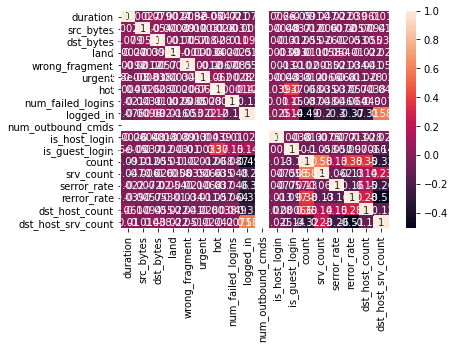

In [18]:
sns.heatmap(dataset.corr(),annot=True).figsize=(20,25)

In [23]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'dst_host_count', 'dst_host_srv_count', 'Connections'],
      dtype='object')

In [114]:
X= data[['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'srv_count', 'serror_rate', 'Connections'
       ,'logged_in'
       ]]
y = data['rerror_rate']

<AxesSubplot:xlabel='service', ylabel='serror_rate'>

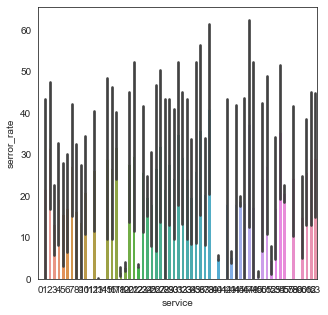

In [57]:
sns.barplot(x='service', y= 'serror_rate', data = X_train)

In [115]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((15780, 18), (6764, 18))

In [116]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [117]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constant Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True]
No. of Non-Constant Features:  17


In [118]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

1
num_outbound_cmds


In [119]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

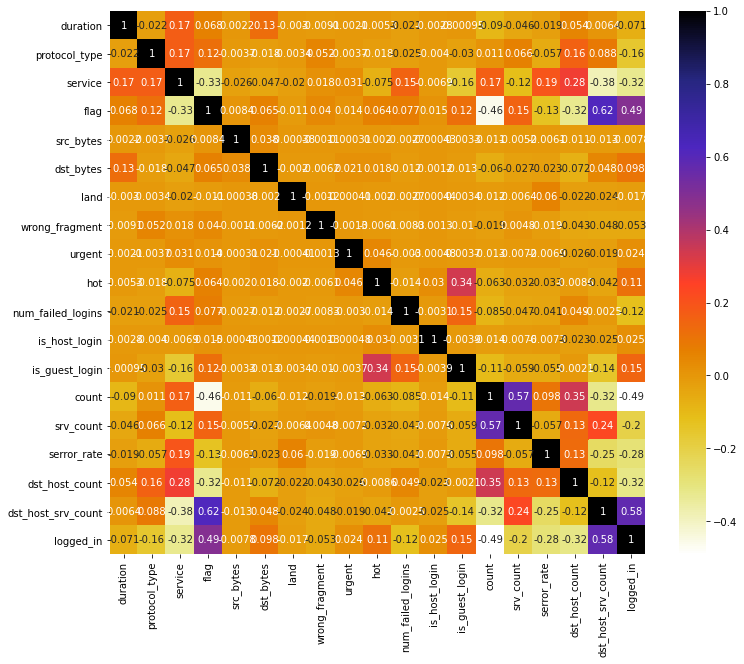

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

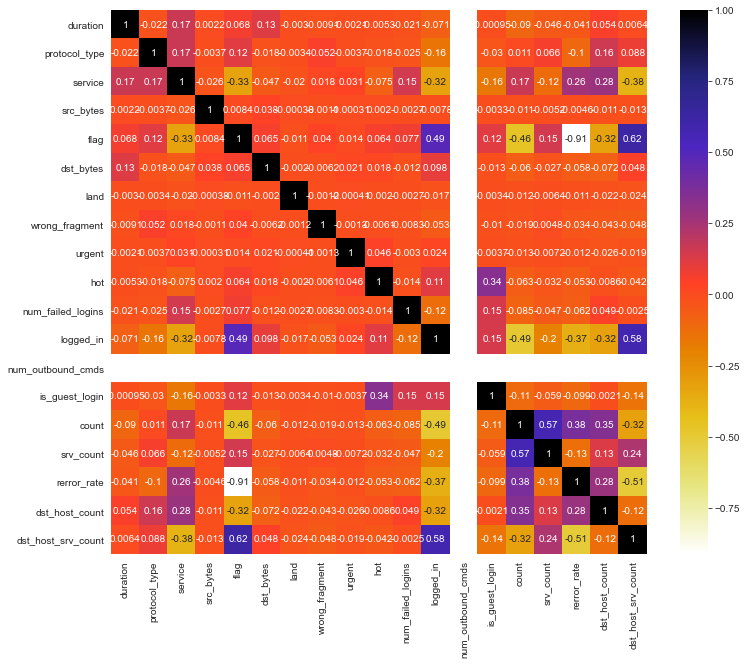

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [120]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [121]:
corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
corr_features


No. of Correlation Features: 0


set()

In [122]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [123]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

binary


In [124]:
utils.multiclass.type_of_target(X_train.astype('int'))
utils.multiclass.type_of_target(y_train.astype('int'))

'binary'

In [125]:
mp=10
X_train.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,is_host_login,is_guest_login,srv_count,serror_rate,Connections,logged_in
17300,0,1,22,9,237,5049,0,0,0,0,0,0,0,1,0,0,1
16819,0,0,14,9,1032,0,0,0,0,0,0,0,0,511,0,0,0


<AxesSubplot:xlabel='service', ylabel='logged_in'>

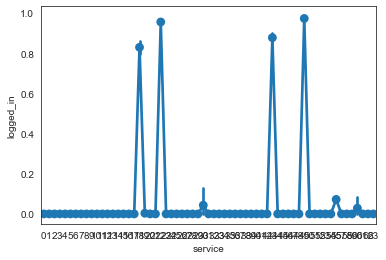

In [70]:
sns.pointplot(x='service', y= 'logged_in', data = X_train)

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

IndexError: index 18 is out of bounds for axis 0 with size 18

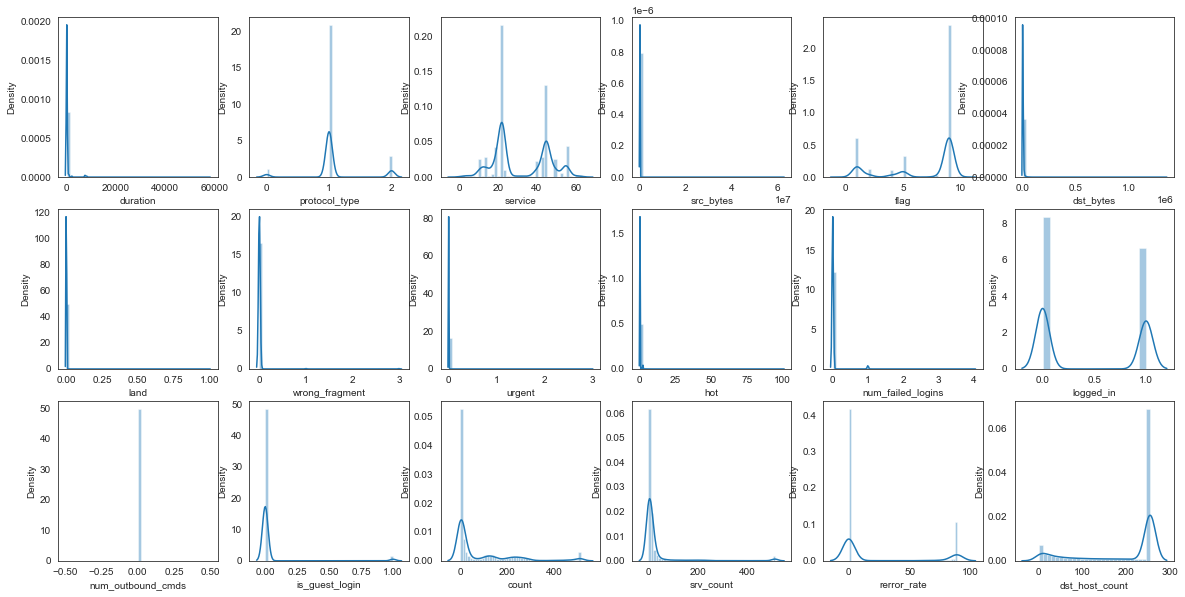

In [71]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [37]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [ ]:
### KNeighbors

In [38]:
#%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model1 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model1.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 81.65%
Recall: 81.65%
Precision: 75.38%
F1-Score: 77.98%
time to train: 0.01 s
time to predict: 3.65 s
total: 3.66 s


In [40]:
knn = model1.predict(X_test)
knn

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
data_set = []
for ele in knn:
    data_set.append(ele)
print(data_set.count(0))
pers = []
pers.append(data_set.count(1))
pers.append(data_set.count(0))
keys = ['pre_non_match', 'pre_match']

6389


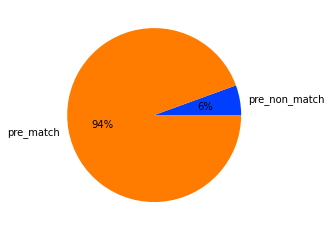

In [44]:
palette_color = sns.color_palette('bright')
plt.pie(pers, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

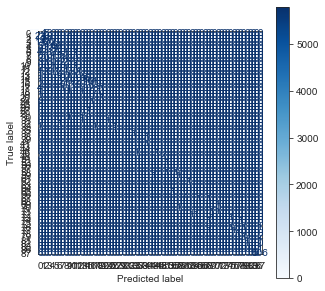

In [29]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model1, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### RandomForest

In [45]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model2 = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model2.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.75 s


In [46]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 82.17%
Recall: 82.17%
Precision: 74.94%
F1-Score: 77.92%
time to train: 1.16 s
time to predict: 0.08 s
total: 1.24 s


In [47]:
RandomForest = model2.predict(X_test)
RandomForest

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
data_set = []
for ele in RandomForest:
    data_set.append(ele)

pers = []
pers.append(data_set.count(1))
pers.append(data_set.count(0))
keys = ['pre_non_match', 'pre_match']

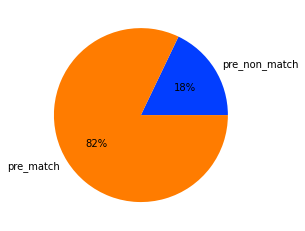

In [78]:
palette_color = sns.color_palette('bright')
plt.pie(pers, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

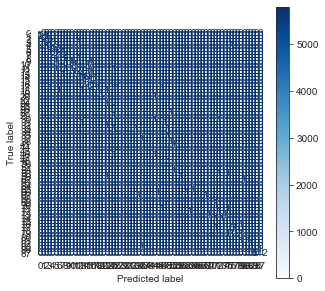

In [32]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [155]:
print('Report:\n',classification_report(y_test, y_predictions))

Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      5807
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        22
           5       0.06      0.05      0.05        22
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00         8
          17      

c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTree

In [50]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model3 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model3.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 52.6 ms


In [51]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 85.36%
Recall: 85.36%
Precision: 72.87%
F1-Score: 78.62%
time to train: 0.05 s
time to predict: 0.00 s
total: 0.05 s


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
Decision_Tree = model3.predict(X_test)
Decision_Tree

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
data_set = []
for ele in Decision_Tree:
    data_set.append(ele)

pers = []
pers.append(data_set.count(1))
pers.append(data_set.count(0))
keys = ['pre_non_match', 'pre_match']

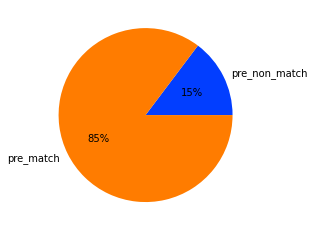

In [68]:
palette_color = sns.color_palette('bright')
plt.pie(pers, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

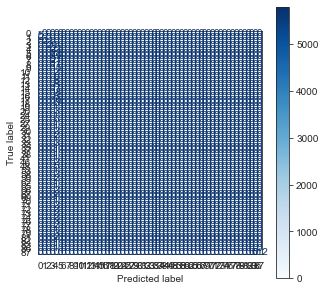

In [36]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model3, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [73]:
### Navie Bayes

In [126]:
#%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
model4 = MultinomialNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model4.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [127]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naive Bayes'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 70.98%
Recall: 70.98%
Precision: 86.70%
F1-Score: 74.27%
time to train: 0.03 s
time to predict: 0.01 s
total: 0.04 s


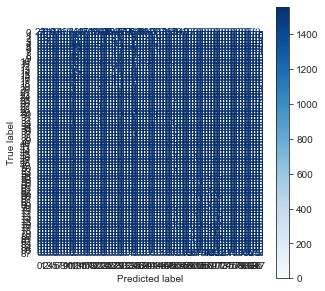

In [39]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model4, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### AdaBoostClassifier

In [132]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
model5 = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model5.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 2.28 s


In [133]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['AdaBoost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.79%
Recall: 96.79%
Precision: 96.91%
F1-Score: 96.83%
time to train: 2.07 s
time to predict: 0.21 s
total: 2.28 s


In [83]:
Agbost = model5.predict(X_test)
Agbost

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
data_set = []
for ele in Agbost:
    data_set.append(ele)

pers = []
pers.append(data_set.count(1))
pers.append(data_set.count(0))
keys = ['pre_non_match', 'pre_match']

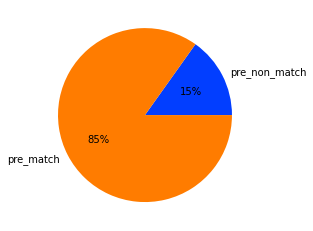

In [87]:

palette_color = sns.color_palette('bright')
plt.pie(pers, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

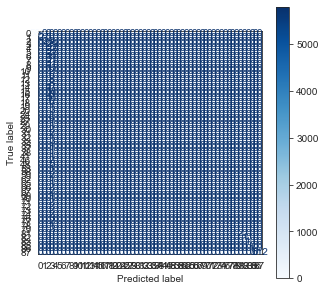

In [41]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model5, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### CAT Boost

In [88]:
%%time
from xgboost import XGBClassifier
start = time.time()
model6 =  XGBClassifier(n_estimators=100, learning_rate=1.0, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model6.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 2.12 s


In [89]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XG Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 81.55%
Recall: 81.55%
Precision: 74.64%
F1-Score: 77.59%
time to train: 1.77 s
time to predict: 0.01 s
total: 1.78 s


In [90]:
CATBoost = model6.predict(X_test)
CATBoost

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
data_set = []
for ele in CATBoost:
    data_set.append(ele)

pers = []
pers.append(data_set.count(1))
pers.append(data_set.count(0))
keys = ['pre_non_match', 'pre_match']

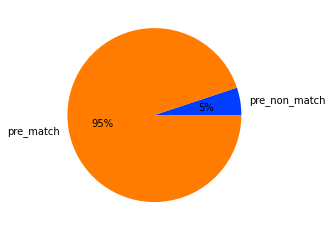

In [92]:
palette_color = sns.color_palette('bright')
plt.pie(pers, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

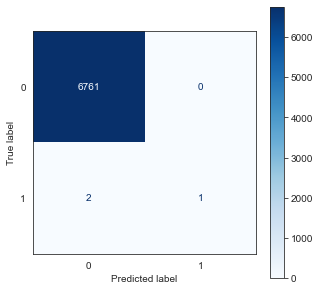

In [54]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model6, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### GradientBoost

In [93]:
%%time
from catboost import CatBoostClassifier
start = time.time()
model7 = CatBoostClassifier(iterations=100).fit(X_train,y_train)
end_train = time.time()
y_predictions = model7.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Learning rate set to 0.276392
0:	learn: 0.5736348	total: 175ms	remaining: 17.3s
1:	learn: 0.5074456	total: 199ms	remaining: 9.73s
2:	learn: 0.4684583	total: 211ms	remaining: 6.83s
3:	learn: 0.4455440	total: 223ms	remaining: 5.35s
4:	learn: 0.4318876	total: 232ms	remaining: 4.41s
5:	learn: 0.4236822	total: 240ms	remaining: 3.76s
6:	learn: 0.4188691	total: 250ms	remaining: 3.32s
7:	learn: 0.4161070	total: 261ms	remaining: 3s
8:	learn: 0.4143247	total: 272ms	remaining: 2.75s
9:	learn: 0.4133226	total: 278ms	remaining: 2.5s
10:	learn: 0.4126095	total: 285ms	remaining: 2.31s
11:	learn: 0.4122228	total: 291ms	remaining: 2.13s
12:	learn: 0.4119689	total: 298ms	remaining: 1.99s
13:	learn: 0.4116087	total: 304ms	remaining: 1.87s
14:	learn: 0.4114065	total: 310ms	remaining: 1.75s
15:	learn: 0.4112535	total: 316ms	remaining: 1.66s
16:	learn: 0.4111525	total: 322ms	remaining: 1.57s
17:	learn: 0.4109678	total: 328ms	remaining: 1.49s
18:	learn: 0.4109034	total: 334ms	remaining: 1.42s
19:	learn: 0.41

In [94]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 85.33%
Recall: 85.33%
Precision: 72.87%
F1-Score: 78.61%
time to train: 1.02 s
time to predict: 0.01 s
total: 1.03 s


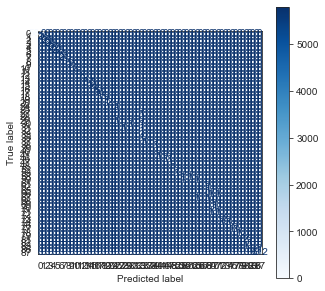

In [47]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model7, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### LinearRegression

In [129]:
#%%time
from sklearn.linear_model import LinearRegression
start = time.time()
model0 = LinearRegression()
model0.fit(X_train,y_train)
end_train = time.time()
y_predictions = model0.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [131]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['LR'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [247]:
LinearRegression = model0.predict(X_test)
LinearRegression

array([ 0.93252887,  0.17348332,  0.82729781, ..., -0.13292003,
        0.80448654,  0.11863259])

In [ ]:
### ExtraTree

In [61]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
kNN,100.00%,100.00%,100.00%,100.00%,0.0,3.5,3.5
Random Forest,99.99%,99.99%,99.99%,99.98%,0.6,0.2,0.8
Decision Tree,99.97%,99.97%,99.97%,99.96%,0.0,0.0,0.1
Naive Bayes,28.06%,28.06%,99.96%,43.77%,0.0,0.0,0.0
AdaBoost,99.97%,99.97%,99.97%,99.97%,2.0,0.2,2.1
XG Boost,99.97%,99.97%,99.97%,99.96%,1.2,0.0,1.2
Cat Boost,99.99%,99.99%,99.99%,99.98%,1.2,0.0,1.2


In [134]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
kNN,81.65%,81.65%,75.38%,77.98%,0.0,3.7,3.7
Random Forest,82.17%,82.17%,74.94%,77.92%,1.2,0.1,1.2
Decision Tree,85.36%,85.36%,72.87%,78.62%,0.0,0.0,0.1
Naive Bayes,70.98%,70.98%,86.70%,74.27%,0.0,0.0,0.0
AdaBoost,96.79%,96.79%,96.91%,96.83%,2.1,0.2,2.3
XG Boost,81.55%,81.55%,74.64%,77.59%,1.8,0.0,1.8
Cat Boost,85.33%,85.33%,72.87%,78.61%,1.0,0.0,1.0
